# Shallow Neural Network

In 'Introduction to Computer Vision' fashion recognition has been performed using a neural network containing three layers, the input layer (in the shape of the data), the output layer (in the shape of the desired output) and one hidden layer. We experimented with the impact of different sizes of hidden layer and number of training epochs on the final accuracy.
A shallow neural network has only one or a few layers of neurons, while a deep neural network has many. The choice of shallow or deep architecture depends on the complexity of the task, amount of accessible data, and the computational resources available.
Here our original network:

In [ ]:
# First import all the libraries you will need
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("\nMODEL TRAINING:")
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print("\nMODEL EVALUATION:")
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f'test set accuracy: {test_accuracy}')
print(f'test set loss: {test_loss}')


MODEL TRAINING:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7794 - loss: 0.6377
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8633 - loss: 0.3890
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8743 - loss: 0.3423
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8844 - loss: 0.3181
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8920 - loss: 0.2945

MODEL EVALUATION:
test set accuracy: 0.8725000023841858
test set loss: 0.354045033454895


## Convolutional Neural Network

The SNN accuracy is about 89% on training and 87% on validation. We can improve that using Convolutions.

Convolutions perform image processing using a filter, just like in image editing. It takes an array (usually 3x3 or 5x5) and scan it over the entire image, changing the underlying pixels based on the formula within that matrix.

Edge detection is especially useful for computer vision because it often highlights features that distinguish one item from another. With the help of Pooling we can train just on the highlighted features, reducing the amount of information.

A **Convolutional Neural Network** has layers to do convolution and pooling (MaxPooling in this case) before the dense layer.

In [ ]:
# Define the model
model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("\nMODEL TRAINING:")
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print("\nMODEL EVALUATION:")
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f'test set accuracy: {test_accuracy}')
print(f'test set loss: {test_loss}')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)


MODEL TRAINING:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7803 - loss: 0.6062
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8917 - loss: 0.2967
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9071 - loss: 0.2490
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9206 - loss: 0.2158
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9295 - loss: 0.1854

MODEL EVALUATION:
test set accuracy: 0.9126999974250793
test set loss: 0.256797730922699


The accuracy has gone up to about 92% on the training data and 91% on the validation data.

The [Conv2D layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) parameters are:

1. The number of convolutions you want to generate. The value here is purely arbitrary but it's good to use powers of 2 starting from 32
2. The size of the Convolution. In this case, a 3x3 grid
3. The activation function to use. In this case a ReLU, which is the equivalent of returning `x` when `x>0`, else return `0`

The convolution layer is followed by a [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layer which is designed to compress the image, while maintaining the content of the features that were highlighted by the convolution. By specifying `(2,2)` for the MaxPooling, the effect is to reduce the image to 25% of the original image.

`model.summary()` shows the size and shape of the network, after every max pooling layer, the image size is reduced in this way.


# Visualizing the Convolutions and Pooling

The cell below prints the first 100 labels in the test set, the ones at index `0`, index `23` and index `28` are all the same value, `9`, they are all shoes. Running the convolution on each starts to highlight common features. Now, when the dense layer is training on the output of the convolution layers, it is working with a lot less, and it is perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [ ]:
print(f"First 100 labels:\n\n{test_labels[:100]}")

print(f"\nShoes: {[i for i in range(100) if test_labels[:100][i]==9]}")

First 100 labels:

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]

Shoes: [0, 23, 28, 39, 68, 83]


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_4']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


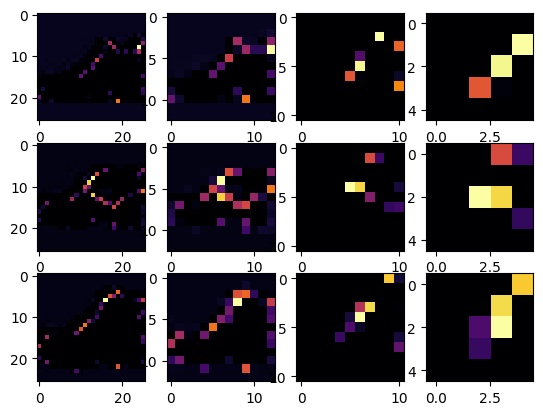

In [ ]:
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1
layers_to_visualize = [tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D]

layer_outputs = [layer.output for layer in model.layers if type(layer) in layers_to_visualize]
activation_model = tf.keras.models.Model(inputs = model.inputs, outputs=layer_outputs)

f, axarr = plt.subplots(3,len(layer_outputs))

for x in range(len(layer_outputs)):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)

    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[1,x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)

    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[2,x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

### EXERCISES

1. Edit the convolutions: change the 64s to either 16 or 32. What impact does this have on accuracy and/or training time?
The training time decreases as well as the accuracy, but just slightly.

In [ ]:
# Define the model
model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("\nMODEL TRAINING:")
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print("\nMODEL EVALUATION:")
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f'test set accuracy: {test_accuracy}')
print(f'test set loss: {test_loss}')

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          51,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,098 (215.23 KB)

 Trainable params: 55,098 (215.23 KB)

 Non-trainable params: 0 (0.00 B)


MODEL TRAINING:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7504 - loss: 0.6945
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8672 - loss: 0.3619
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8866 - loss: 0.3089
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8966 - loss: 0.2827
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9063 - loss: 0.2544

MODEL EVALUATION:
test set accuracy: 0.8956000208854675
test set loss: 0.2818506360054016


2. Remove the final Convolution. What impact will this have on accuracy or training time?
The training time is shorter. The accuracy is higher but just for the training data, the accuracy for the validation data remains the same. Can this mean overfitting?

In [ ]:
# Define the model
model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),


    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("\nMODEL TRAINING:")
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print("\nMODEL EVALUATION:")
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f'test set accuracy: {test_accuracy}')
print(f'test set loss: {test_loss}')

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)


MODEL TRAINING:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8152 - loss: 0.5198
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9023 - loss: 0.2635
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9253 - loss: 0.2060
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9377 - loss: 0.1689
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9478 - loss: 0.1399

MODEL EVALUATION:
test set accuracy: 0.9132999777793884
test set loss: 0.25770893692970276


3. How about adding more Convolutions? What impact do you think this will have? Experiment with it. Longer training time, lower accuracy.

In [ ]:
# Define the model
model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),


    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("\nMODEL TRAINING:")
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print("\nMODEL EVALUATION:")
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f'test set accuracy: {test_accuracy}')
print(f'test set loss: {test_loss}')

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,106 (328.54 KB)

 Trainable params: 84,106 (328.54 KB)

 Non-trainable params: 0 (0.00 B)


MODEL TRAINING:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7166 - loss: 0.7694
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8543 - loss: 0.3963
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8799 - loss: 0.3253
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8933 - loss: 0.2870
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9004 - loss: 0.2643

MODEL EVALUATION:
test set accuracy: 0.887499988079071
test set loss: 0.3086960017681122


4. Remove all Convolutions but the first and also remove pooling. What impact do you think this will have? Experiment with it. Accuracy increased compared to the original model with 2 layers of Convolution and Pooling, but only for the training model. The validation model has instead lower accuracy and higher loss. This might be a sign of overfitting. Training time was about the same.

In [ ]:
# Define the model
model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),



    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("\nMODEL TRAINING:")
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print("\nMODEL EVALUATION:")
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f'test set accuracy: {test_accuracy}')
print(f'test set loss: {test_loss}')

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │       5,537,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,539,850 (21.13 MB)

 Trainable params: 5,539,850 (21.13 MB)

 Non-trainable params: 0 (0.00 B)


MODEL TRAINING:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8219 - loss: 0.5048
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9110 - loss: 0.2434
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9336 - loss: 0.1825
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9494 - loss: 0.1381
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9616 - loss: 0.1044

MODEL EVALUATION:
test set accuracy: 0.9053999781608582
test set loss: 0.3182125389575958


5. Implement a callback to check on the loss function and to cancel training once it hits a certain amount.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

# Define the model
model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),


    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("\nMODEL TRAINING:")
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

# Evaluate on the test set
print("\nMODEL EVALUATION:")
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f'test set accuracy: {test_accuracy}')
print(f'test set loss: {test_loss}')



Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)


MODEL TRAINING:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8190 - loss: 0.5104
Epoch 2/5
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9051 - loss: 0.2615
Reached 90% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9051 - loss: 0.2615

MODEL EVALUATION:
test set accuracy: 0.8986999988555908
test set loss: 0.28050318360328674
